<a href="https://www.kaggle.com/code/ayushs9020/ml-vs-eda-who-will-win?scriptVersionId=139814408" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Clustering The ML Training </p>

In [1]:
import warnings
warnings.filterwarnings("ignore")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = 'https://media.licdn.com/dms/image/C4D22AQEmL0TMIAsrDQ/feedshare-shrink_2048_1536/0/1662472965580?e=1693440000&v=beta&t=JNReaHvxmedib1aZ40k2xFr9nvrfGwDqysBpUwtLZIc' width = 400>
    

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Ah, the `Age-Old Battle` between $Machine$ $Learning$ $(ML)$ and $Exploratory$ $Data$ $Analysis$ $(EDA)$. It's like the `eternal struggle` between `good and evil`/`light and darkness`/`cats and dogs`. 

**But which one is the true champion of data analysis...?** 

Well, let me tell you, `it's definitely not EDA`. I mean, `who needs` to `explore data` when you can `just throw` a `bunch of algorithms` at it and `hope for the best`? $ML$ is like the `cool kid` in town, while $EDA$ is like the `nerdy kid` who `still plays` with `side rules`. 

But hey, at least $EDA$ has its `uses`, like, uh..., `finding patterns` and stuff... Yeah, `real exciting stuff`. Just don't expect it to win any popularity contests among the data science crowd. 

That's right, $ML$ is where it's at, folks! `Who needs understanding` their `data` when they can `just build a model` that will `probably work sometimes?`

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFC67D; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFC67D">1 | Data 📊</p>

In [2]:
import pandas as pd 
import tqdm
import ast

pd.options.mode.chained_assignment = None

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

I did some off-camera preprocessing and made a dataframe like this 

In [3]:
data = pd.read_csv('/kaggle/input/trends-over-time-kaggle/Trends Over Time.csv')
data.head()

,Unnamed: 0,libraries,n_codes,n_markdowns,date_time
0,45745,"['make_subplots', 'numpy', 'os', 'ProfileRepor...",11276.0,7857.0,2020-11-24 12:25:01.694268+00:00
1,45767,"['StratifiedKFold', 'keras', 'matplotlib', 'Le...",11400.0,11799.0,2020-11-02 17:11:23.621280+00:00
2,45776,"['numpy', 'pandas', 'tensorflow', 'math', 'Seq...",5443.0,1891.0,2020-10-10 21:25:09.942910+00:00
3,45816,"['StratifiedKFold', 'keras', 'matplotlib', 'Le...",11414.0,11799.0,2020-11-02 17:11:23.621280+00:00
4,45821,"['_WeightedLoss', 'RAdam', 'matplotlib', 'copy...",48460.0,17.0,2020-10-27 19:06:31.810461+00:00


In [4]:
for index in tqdm.tqdm(range(data.shape[0]) , total = data.shape[0] , desc = ''):
    data['libraries'][index] = ast.literal_eval(data['libraries'][index])

100%|██████████| 117964/117964 [04:24<00:00, 445.31it/s]


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#A9D700; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #A9D700">2 | Data Preprocessing 💻</p>

In [5]:
import numpy as np 

<div style="border-radius:10px; border:#A9D700 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

After thinking for an eternity, I came up to the `conclusion`, that if someone is doing $ML$ on $Kaggle$. There will be a `high chance` that `he`/`she` will `use one of the following libraires`. So if the person uses one of these libraries. We can consider that he/she is doing/did some ML stuff on the notebook

**Please suggest more libraries in the comments, if I missed any. I am lazy and thus cannot think much**

In [6]:
ml = ['sklearn' , 'preprocessing' , 'decomposition' , 'model_selection' , 'metrics' 
      'neighbors' , 'linear_model' , 'naive_bayes' , 'ensemble' , 'xgboost' , 
      'StandardScaler' , 'FunctionTransformer' , 'PCA' , 'OneHotEncoder'
      'KNeighborsClassifier' , 'KNeighborsRegressor' , 
      'LinearRegression' , 'LogisticRegression' , 'SGDRegressor' , 'Ridge' , 'Lasso' , 
      'DecisionTreeClassifier' , 'DecisionTreeRegressor' , 
      'RandomForestCLassifier' , 'RandomForestRegressor' , 
      'accuracy_score' , 'classification_report' , 
      'root_mean_square_error' , 'r2_score']

<div style="border-radius:10px; border:#A9D700 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

We will do the same with $EDA$ specific libraries

In [7]:
dv = ['matplotlib' , 'pyplot' , 'seaborn' , 'go' , 'plotly']

<div style="border-radius:10px; border:#A9D700 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we will check if the person has used any of these libraries

In [8]:
data['ml'] = np.zeros(shape = data.shape[0])
data['dv'] = np.zeros(shape = data.shape[0])

In [9]:
for index in tqdm.tqdm(range(data.shape[0]) , total = data.shape[0] , desc = 'Encoding --->'):
    val = data['libraries'][index]
    for value in val :
#         print(value)
        if value in ml : 
            data['ml'][index] = float(1)
            break
    for value in val :
        if value in dv:
            data['dv'][index] = float(1)

Encoding --->: 100%|██████████| 117964/117964 [00:58<00:00, 2004.40it/s]


<div style="border-radius:10px; border:#A9D700 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we will remove some unecessory libraries

In [10]:
data.drop(['Unnamed: 0' , 'libraries' , 'date_time'] , axis = 1 , inplace = True)

<div style="border-radius:10px; border:#A9D700 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

At the end our data looks like this. 

We assume that, $EDA$ `requires compartively less amount of code` as compared to $ML$, This assumption ignore outliers and apply the concept on the majority of the users

In [11]:
data.head()

,n_codes,n_markdowns,ml,dv
0,11276.0,7857.0,1.0,1.0
1,11400.0,11799.0,1.0,1.0
2,5443.0,1891.0,0.0,0.0
3,11414.0,11799.0,1.0,1.0
4,48460.0,17.0,1.0,1.0


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#03A9F4; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #03A9F4">3 | Visualization 📈</p>

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

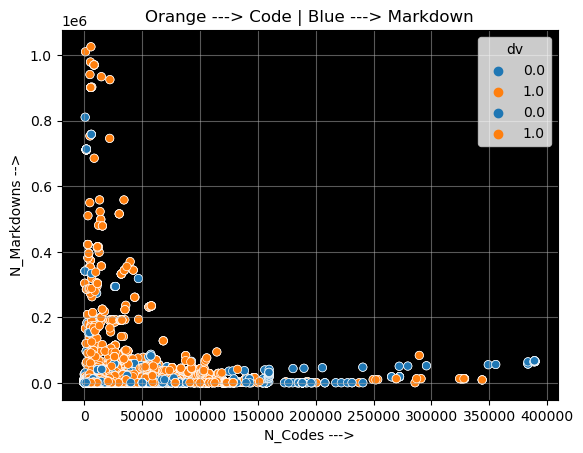

In [13]:
plt.axes().set_facecolor('black')

sns.scatterplot(x = data['n_codes'] , y = data['n_markdowns'] , hue = data['ml'])
sns.scatterplot(x = data['n_codes'] , y = data['n_markdowns'] , hue = data['dv'])

plt.title('Orange ---> Code | Blue ---> Markdown')
plt.xlabel('N_Codes --->')
plt.ylabel('N_Markdowns -->')

plt.grid(which='both', axis='both', alpha=0.5)

plt.show()

<div style="border-radius:10px; border:#03A9F4 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">


We can see that these actually blend much, but generally $ML$ tends to contain more code cells and $EDA$ tends to more Markdowns

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">4 | Ending 🏁</p>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE $:)$**
    
<img src = "https://i.imgflip.com/19aadg.jpg">
   
**PEACE OUT**